In [ ]:
# @title Importar as bibliotecas e carregar os dados.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import numpy as np

dataset = pd.read_csv('/content/AULA_BASE_FULL.txt', sep='\t') # Separador TAB
dataset.head(5)

,Contrato,PessoaFisica,Nome,Sexo,DataNascimento,NomeMae,Uf,EstadoCivil,Profissao,NumeroContrato,Carteira,DataRecebimentoContrato,VencDebito,DataAssociacao,qtdeTItulo,VLR_DEBITO,QTDE_TENTATIVAS_CTTO,QTDEPGTO,VLR_PGTO
0,10001798,F,LIB,F,1965-09-12 00:00:00.000,NEL,NaN,Casado(a),IGREJA ADVENTISTA,10001798.0,PDD (121 a 360),31/01/2012 00:00,2011-05-05 00:00:00.000,07/11/2000 00:00,1.0,1576.71,48.0,NaN,NaN
1,10009549,F,JOS,NaN,1980-04-10 00:00:00.000,NUL,NaN,Solteiro(a),PAULO SERGIO PEREIRA ASSAF/AUXI,10009549.0,PDD (121 a 360),20/08/2008 00:00,2007-11-20 00:00:00.000,09/11/2000 00:00,1.0,56.74,21.0,NaN,NaN
2,10016650,F,EDS,M,1971-01-22 00:00:00.000,DIO,NaN,Casado(a),IRMAO MOSCA LTDA,10016650.0,PDD (121 a 360),29/03/2012 00:00,2011-09-30 00:00:00.000,11/11/2000 00:00,8.0,912.00,36.0,NaN,NaN
3,10018110,F,SIL,M,1975-10-12 00:00:00.000,CIR,NaN,Casado(a),COORDENADORIA GERAL DA GUARDA,10018110.0,PDD (121 a 360),07/02/2012 00:00,2011-08-10 00:00:00.000,11/11/2000 00:00,2.0,218.32,19.0,NaN,NaN
4,1003107,F,NAT,M,1962-12-19 00:00:00.000,LAU,SP,OUTROS,AUTONOMO PINTOR,1003107.0,FASES 2 (721 a 1800),15/10/2012 00:00,2010-01-26 00:00:00.000,30/09/1991 00:00,6.0,274.32,49.0,NaN,NaN


In [ ]:
#@title Avaliar a quantidade de dados preenchidos em cada variavel.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Contrato                 5000 non-null   int64         
 1   PessoaFisica             5000 non-null   object        
 2   Nome                     5000 non-null   object        
 3   Sexo                     4986 non-null   object        
 4   DataNascimento           5000 non-null   datetime64[ns]
 5   NomeMae                  4967 non-null   object        
 6   Uf                       1876 non-null   object        
 7   EstadoCivil              4990 non-null   object        
 8   Profissao                4669 non-null   object        
 9   NumeroContrato           4775 non-null   float64       
 10  Carteira                 4775 non-null   object        
 11  DataRecebimentoContrato  4775 non-null   object        
 12  VencDebito               4560 non-

In [ ]:
#@title Analise de missings por variaveis
dataset.isnull().sum()

Contrato                      0
PessoaFisica                  0
Nome                          0
Sexo                         14
DataNascimento                0
NomeMae                      33
Uf                         3124
EstadoCivil                  10
Profissao                   331
NumeroContrato              225
Carteira                    225
DataRecebimentoContrato     225
VencDebito                  440
DataAssociacao              225
qtdeTItulo                  588
VLR_DEBITO                  588
QTDE_TENTATIVAS_CTTO        348
QTDEPGTO                   4452
VLR_PGTO                   4452
Idade                         0
IdadeDebito                 440
dtype: int64

In [ ]:
# @title Converte a data de nascimento para "datetime" depois, calcula a idade com base na data de nascimento e o dia de hoje, em seguida cria uma nova coluna com a idade de cada pessoa.
dataset['DataNascimento'] = pd.to_datetime(dataset['DataNascimento'])
dataset['Idade'] = (datetime.now() - dataset['DataNascimento']) / 365
dataset['Idade'] = (dataset['Idade']).dt.days
dataset['Idade'].value_counts()

38     172
39     170
33     167
43     165
34     162
      ... 
97       3
99       1
96       1
94       1
101      1
Name: Idade, Length: 72, dtype: int64

In [ ]:
# @title Converte a data de vencimento do debito para "datetime" depois, calcula a idade do debito.
dataset['VencDebito'] = pd.to_datetime(dataset['VencDebito'])
dataset['IdadeDebito'] = (datetime.now() - dataset['VencDebito']) / 365
dataset['IdadeDebito'] = (dataset['IdadeDebito']).dt.days
dataset['IdadeDebito'].value_counts()

9.0     1852
10.0     965
11.0     664
8.0      507
12.0     416
13.0     149
14.0       7
Name: IdadeDebito, dtype: int64

In [ ]:
#@title Avaliar as variáveis quantitativas (Avg, Desvio Padrão, Max e Min).
dataset.describe().round()

,Contrato,NumeroContrato,qtdeTItulo,VLR_DEBITO,QTDE_TENTATIVAS_CTTO,QTDEPGTO,VLR_PGTO,Idade,IdadeDebito
count,5000.0,4775.0,4412.0,4412.0,4652.0,548.0,548.0,5000.0,4560.0
mean,18424095.0,18387605.0,10.0,987.0,41.0,6.0,831.0,46.0,10.0
std,6765830.0,6777531.0,9.0,1006.0,34.0,4.0,826.0,13.0,1.0
min,49644.0,49644.0,1.0,0.0,1.0,1.0,47.0,27.0,8.0
25%,14937166.0,14878440.0,4.0,299.0,17.0,3.0,272.0,36.0,9.0
50%,20363686.0,20344936.0,8.0,675.0,31.0,6.0,556.0,44.0,9.0
75%,23454588.0,23436324.0,13.0,1336.0,56.0,10.0,1101.0,54.0,11.0
max,27656613.0,27530486.0,81.0,10142.0,278.0,19.0,7214.0,101.0,14.0


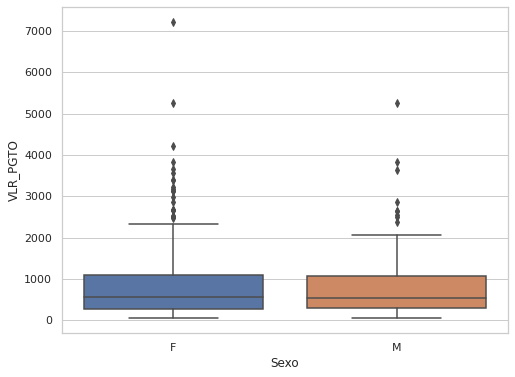

In [ ]:
#@title Analise de outliers na variavel VLR_PGTO x Sexo.
get_ipython().run_line_magic('matplotlib', 'inline')

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

graph = sns.boxplot(x='Sexo', y='VLR_PGTO', data=dataset, orient="v")

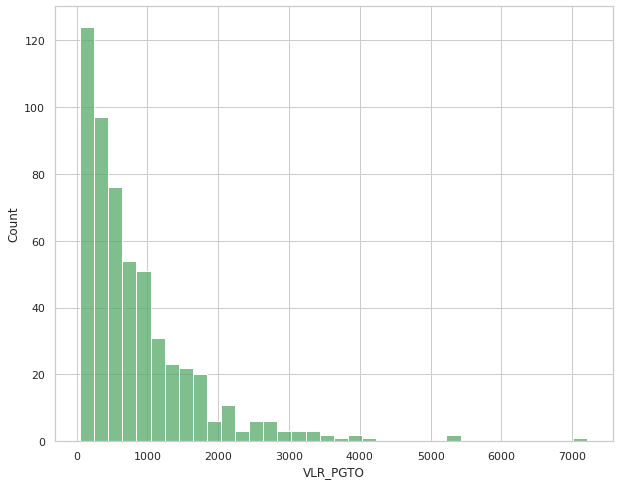

In [ ]:
#@title Eliminamos dados nulos e validamos que o maior volume de contratos está concentrado no valor de até R$2000,00.

filter_data = dataset.dropna(subset=['VLR_PGTO'])
plt.figure(figsize=(10,8))
ax = sns.histplot(filter_data['VLR_PGTO'], color='g', kde=False)


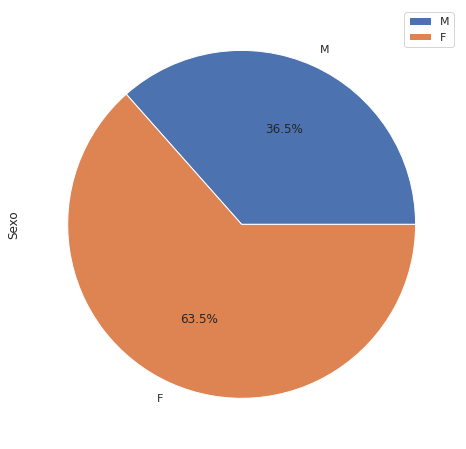

In [ ]:
#@title Analisamos a frequência relativa por sexo dos devedores.

filter_data = dataset.dropna(subset=['Sexo'])
type_counts = filter_data['Sexo'].value_counts()

dataset2 = pd.DataFrame({'Sexo': type_counts}, index = ['M', 'F'])
dataset2.plot.pie(y='Sexo', figsize=(8,8), autopct='%1.1f%%')

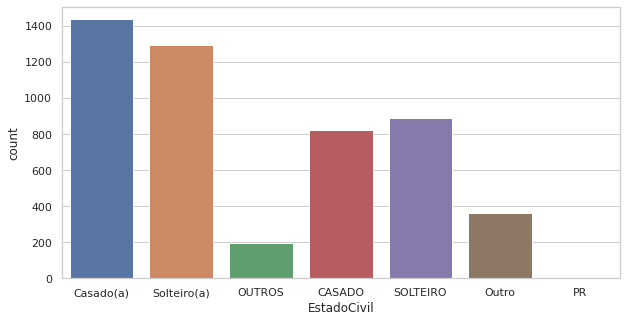

In [ ]:
#@title Analisamos a quantidade de devedores por estado Civil, podemos concluir que Casado x Solteiro estão com valores bem proximos.

plt.figure(figsize=(10,5))
graph = sns.countplot(x='EstadoCivil', data=dataset)

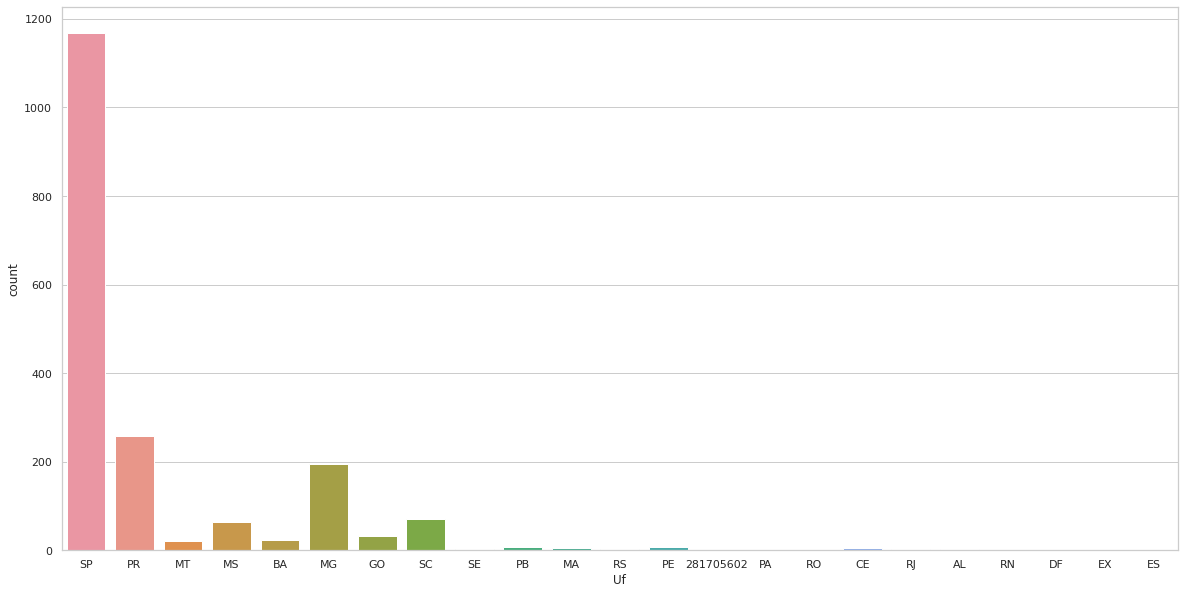

In [ ]:
#@title Analisamos a quantidade de devedores por Estado.

plt.figure(figsize=(20,10))
graph = sns.countplot(x='Uf', data=dataset)

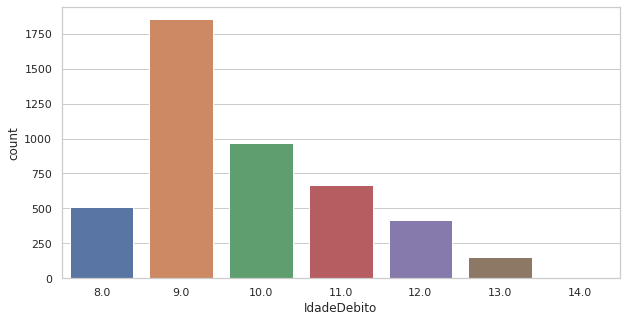

In [ ]:
#@title Analisamos a quantidade de devedores por tempo de debito.

plt.figure(figsize=(10,5))
graph = sns.countplot(x='IdadeDebito', data=dataset)

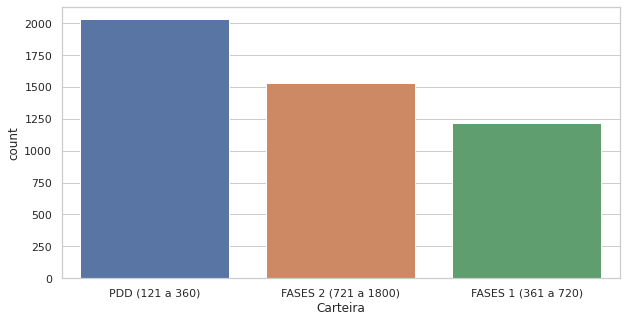

In [ ]:
#@title Analisamos a quantidade de devedores por Carteira
plt.figure(figsize=(10,5))
graph = sns.countplot(x='Carteira', data=dataset)

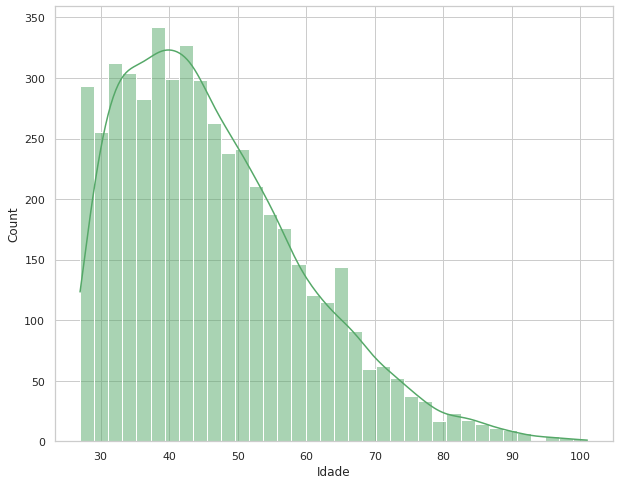

In [ ]:
#@title Mostra em histograma a quantidade geral por idade
filter_data = dataset.dropna(subset=['Idade'])
plt.figure(figsize=(10,8))
ax = sns.histplot(filter_data['Idade'], color='g', kde=True)

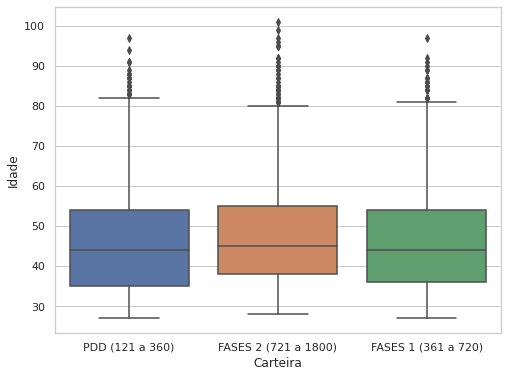

In [ ]:
#@title Analise de outliers nas variaveis Carteira x Idade
get_ipython().run_line_magic('matplotlib', 'inline')

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

graph = sns.boxplot(x='Carteira', y='Idade', data=dataset, orient="v")

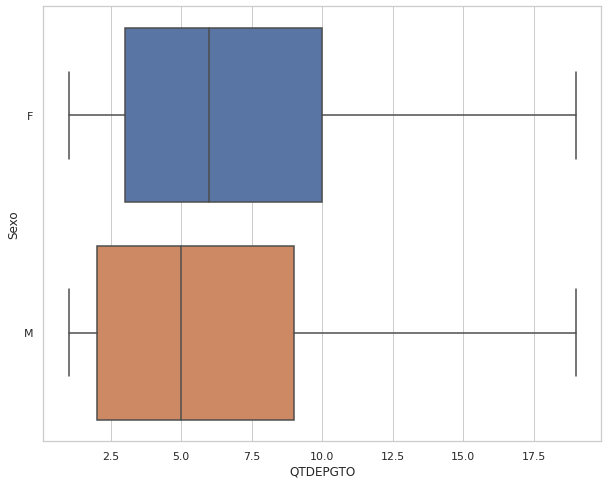

In [ ]:
#@title Analise de outliers nas variaveis QTDPGTO x Sexo
get_ipython().run_line_magic('matplotlib', 'inline')

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
graph = sns.boxplot(x='QTDEPGTO', y='Sexo', data=dataset, orient="h")

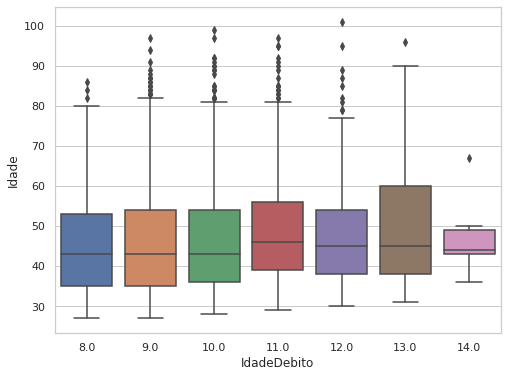

In [ ]:
#@title Analise de outliers nas variaveis IdadeDebito x Idade
get_ipython().run_line_magic('matplotlib', 'inline')

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

graph = sns.boxplot(x='IdadeDebito', y='Idade', data=dataset, orient="v")

In [ ]:
""""
OK 3   Sexo                     	  	4986 non-null   object 
4   DataNascimento         	  	5000 non-null   object 
6   Uf                       	  	1876 non-null   object 
OK 7   EstadoCivil         	  	4990 non-null   object 
OK 8   Profissao               	  	4669 non-null   object 
OK 10  Carteira               	  	4775 non-null   object 
11  DataRecebimentoContrato  	4775 non-null   object 
OK 12  VencDebito              	  	4560 non-null   object 
13  DataAssociacao         	  	4775 non-null   object 
14  qtdeTItulo               	 	4412 non-null   float64
OK 15  VLR_DEBITO             		4412 non-null   float64
16  QTDE_TENTATIVAS_CTTO     	4652 non-null   float64
OK 17  QTDEPGTO                 	548 non-null    float64
OK 18  VLR_PGTO                 	 	548 non-null    float64
OK 19 Idade 
OK 20 IdadeDebito"""

'OK 3   Sexo                     \t  \t4986 non-null   object \n 4   DataNascimento         \t  \t5000 non-null   object \n 6   Uf                       \t  \t1876 non-null   object \n OK 7   EstadoCivil         \t  \t4990 non-null   object \n OK 8   Profissao               \t  \t4669 non-null   object \n OK 10  Carteira               \t  \t4775 non-null   object \n 11  DataRecebimentoContrato  \t4775 non-null   object \n OK 12  VencDebito              \t  \t4560 non-null   object \n 13  DataAssociacao         \t  \t4775 non-null   object \n 14  qtdeTItulo               \t \t4412 non-null   float64\n OK 15  VLR_DEBITO             \t\t4412 non-null   float64\n 16  QTDE_TENTATIVAS_CTTO     \t4652 non-null   float64\n OK 17  QTDEPGTO                 \t548 non-null    float64\n OK 18  VLR_PGTO                 \t \t548 non-null    float64\n OK 19 Idade \n OK 20 IdadeDebito'

In [ ]:
dataset = dataset.drop(columns=['QTDEPGTO_FX'])

In [ ]:
#tratamento da qtde pgto por faixas
for x in dataset['QTDEPGTO']:
  if np.isnan(x):
    dataset['QTDEPGTO_FX'] = 'Nulo'
  elif x <= 4.0:
    dataset['QTDEPGTO_FX'] = '1 a 4'
  elif x <= 8.0:
    dataset['QTDEPGTO_FX'] = '5 a 8'
  elif x <= 12.0:
    dataset['QTDEPGTO_FX'] = '9 a 12'
  elif x <= 16.0:
    dataset['QTDEPGTO_FX'] = '13 a 16'
  else:
    dataset['QTDEPGTO_FX'] = 'Acima de 17'


#dataset['PRE_DIAS_P'] = [1 if np.isnan(x) or x > 60 else x/60 for x in dataset['DIAS_PRIMEIRA_PARCELA']]     

In [ ]:
print(dataset.head(100))    

    Contrato PessoaFisica Nome  ... QTDEPGTO VLR_PGTO Idade
0   10001798            F  LIB  ...      NaN      NaN    55
1   10009549            F  JOS  ...      NaN      NaN    40
2   10016650            F  EDS  ...      NaN      NaN    50
3   10018110            F  SIL  ...      NaN      NaN    45
4    1003107            F  NAT  ...      NaN      NaN    58
..       ...          ...  ...  ...      ...      ...   ...
95   1113368            F  LUC  ...      NaN      NaN    60
96  11147974            F  VAL  ...      3.0    217.5    44
97   1115896            F  VER  ...      NaN      NaN    61
98  11164404            F  ROS  ...      NaN      NaN    46
99  11196337            F  CLA  ...      NaN      NaN    50

[100 rows x 20 columns]


In [ ]:
 dataset['VLR_PGTO'].value_counts() 


100.00     7
50.00      6
200.00     5
1664.36    5
526.00     4
          ..
2972.80    1
355.60     1
2136.28    1
355.20     1
115.00     1
Name: VLR_PGTO, Length: 481, dtype: int64